In [2]:
from matplotlib import pyplot as plt
from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd

In [3]:
def fetch_html_tables(url):
    "Returns a list of tables in the html of url"
    page = requests.get(url)
    bs=BeautifulSoup(page.content)
    tables=bs.find_all('table')
    return tables

tables=fetch_html_tables('https://www.altomfotball.no/element.do?cmd=tournamentTable&tournamentId=236&useFullUrl=false')
table_html=tables[0]

#printing top
print(str(table_html)[:1000])

<table border="0" cellpadding="0" cellspacing="0" class="sd_table sd_sortable sd_sortabletable" id="sd_table_236" summary="Tabell">
<thead>
<tr>
<th class="sd_table_rank"><span> </span></th>
<th class="sd_table_team"><span>Lag</span></th>
<th title="Kamper"><span>K</span></th>
<th title="Vunnet"><span>V</span></th>
<th title="Uavgjorte"><span>U</span></th>
<th title="Tapte"><span>T</span></th>
<th title="Mål for"><span>+</span></th>
<th title="Mål mot"><span>-</span></th>
<th title="Målforskjell"><span>+/-</span></th>
<th class="sd_table_points" title="Poeng"><span>P</span></th>
<th class="sd_left">Siste Kamper</th>
</tr>
</thead>
<tbody>
<tr class="sd_table_none sd_odd">
<td class="sd_table_new">1.</td>
<td class="sd_table_team">
<a href="element.do?cmd=team&amp;teamId=940&amp;tournamentId=236&amp;useFullUrl=false">Milan</a></td>
<td>35</td>
<td>23</td>
<td>8</td>
<td>4</td>
<td>61</td>
<td>30</td>
<td>+31</td>
<td class="sd_table_points">77</td>
<td class="sd_left" style="padding-rig

In [4]:
def html_to_table(html):
    "Returns the table defined in html as a list"
    #defining the table:
    table=[]
    #iterating over all rows
    for row in html.find_all('tr'):
        r=[]
        #finding all cells in each row:
        cells=row.find_all('td')
        
        #if no cells are found, look for headings
        if len(cells)==0:
            cells=row.find_all('th')
            
        #iterate over cells:
        for cell in cells:
            cell=format(cell)
            r.append(cell)
        
        #append the row to t:
        table.append(r)
    return table

def format(cell):
    "Returns a string after converting bs4 object cell to clean text"
    if cell.content is None:
        s=cell.text
    elif len(cell.content)==0:
        return ''
    else:
        s=' '.join([str(c) for c in cell.content])
        
    #here you can add additional characters/strings you want to 
    #remove, change punctuations or format the string in other
    #ways:
    s=s.replace('\xa0','')
    s=s.replace('\n','')
    return s

table=html_to_table(table_html)

#printing top
print(str(table)[:1000])

[['', 'Lag', 'K', 'V', 'U', 'T', '+', '-', '+/-', 'P', 'Siste Kamper'], ['1.', 'Milan', '35', '23', '8', '4', '61', '30', '+31', '77', ''], ['2.', 'Inter', '35', '22', '9', '4', '74', '29', '+45', '75', ''], ['3.', 'Napoli', '35', '21', '7', '7', '67', '31', '+36', '70', ''], ['4.', 'Juventus', '35', '20', '9', '6', '54', '31', '+23', '69', ''], ['5.', 'Lazio', '35', '17', '8', '10', '70', '53', '+17', '59', ''], ['6.', 'Roma', '35', '17', '8', '10', '55', '40', '+15', '59', ''], ['7.', 'Atalanta', '35', '15', '11', '9', '62', '44', '+18', '56', ''], ['8.', 'Fiorentina', '35', '17', '5', '13', '54', '47', '+7', '56', ''], ['9.', 'HellasVerona', '35', '14', '10', '11', '61', '52', '+9', '52', ''], ['10.', 'Torino', '35', '12', '11', '12', '45', '37', '+8', '47', ''], ['11.', 'Sassuolo', '35', '12', '10', '13', '60', '61', '-1', '46', ''], ['12.', 'Udinese', '35', '10', '13', '12', '54', '54', '0', '43', ''], ['13.', 'Bologna', '35', '11', '10', '14', '39', '48', '-9', '43', ''], ['14.',

In [5]:
def save_data(file_name,table):
    "Saves table to file_name"
    f=open(file_name,'w')
    for row in table:
        f.write(';'.join(row)+'\n')
    f.close()
    
save_data('serie_a.csv',table)

In [6]:
g = pd.read_csv('serie_a.csv', delimiter=';', encoding='latin1')

In [7]:
g

,Unnamed: 0,Lag,K,V,U,T,+,-,+/-,P,Siste Kamper
0,1.0,Milan,35,23,8,4,61,30,31,77,NaN
1,2.0,Inter,35,22,9,4,74,29,45,75,NaN
2,3.0,Napoli,35,21,7,7,67,31,36,70,NaN
3,4.0,Juventus,35,20,9,6,54,31,23,69,NaN
4,5.0,Lazio,35,17,8,10,70,53,17,59,NaN
5,6.0,Roma,35,17,8,10,55,40,15,59,NaN
6,7.0,Atalanta,35,15,11,9,62,44,18,56,NaN
7,8.0,Fiorentina,35,17,5,13,54,47,7,56,NaN
8,9.0,HellasVerona,35,14,10,11,61,52,9,52,NaN
9,10.0,Torino,35,12,11,12,45,37,8,47,NaN


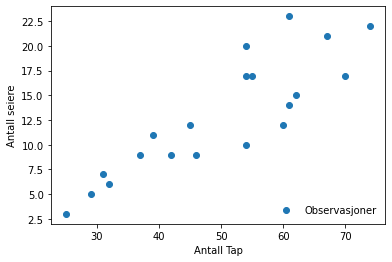

In [8]:
from matplotlib import pyplot as plt

fig,ax=plt.subplots()

#adding axis lables:
ax.set_ylabel('Antall seiere')
ax.set_xlabel('Antall Tap')

#plotting the function:
ax.scatter(g['+'], g['V'],  label='Observasjoner')
ax.legend(loc='lower right',frameon=False)

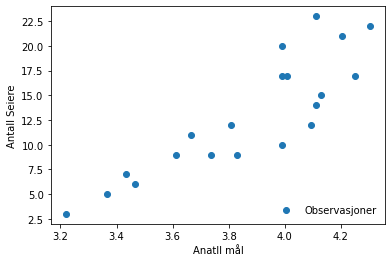

In [9]:
fig,ax=plt.subplots()

#adding axis lables:
ax.set_ylabel('Antall Seiere')
ax.set_xlabel('Anatll mål')



#plotting the function:
ax.scatter(np.log(g['+']), g['V'],  label='Observasjoner')
ax.legend(loc='lower right',frameon=False)

In [10]:
y=g['V']
pd.DataFrame(y)

,V
0,23
1,22
2,21
3,20
4,17
5,17
6,15
7,17
8,14
9,12


In [11]:
x=pd.DataFrame(np.log(g['+']))
x['intercept']=1
x

,+,intercept
0,4.110874,1
1,4.304065,1
2,4.204693,1
3,3.988984,1
4,4.248495,1
5,4.007333,1
6,4.127134,1
7,3.988984,1
8,4.110874,1
9,3.806662,1


In [12]:
from statsmodels.regression.linear_model import OLS

res=OLS(y,x).fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      V   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     55.07
Date:                Thu, 05 May 2022   Prob (F-statistic):           7.02e-07
Time:                        19:32:55   Log-Likelihood:                -49.317
No. Observations:                  20   AIC:                             102.6
Df Residuals:                      18   BIC:                             104.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
+             16.1663      2.178      7.421      0.0

In [13]:
res.params


+            16.166278
intercept   -49.539222
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


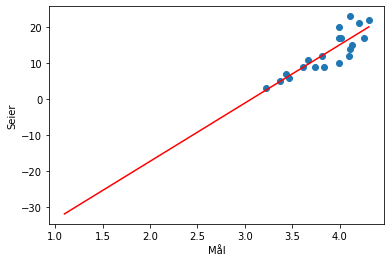

In [14]:
fig,ax=plt.subplots()

x=np.linspace(min(np.log(g['V'])), max(np.log(g['+'])), 40)


regression_line=res.params['intercept']+res.params['+']*x

ax.plot(x, regression_line,color='red')


#adding axis lables:
ax.set_ylabel('Seier')
ax.set_xlabel('Mål')


#plotting the function:
ax.scatter(np.log(g['+']), g['V'],  label='')
ax.legend(loc='lower right',frameon=False)

I oppgaven har jeg laget en regresjonsline som viser korrelasjonen mellom seiere og mål i Serie A i Italia. Her kan vi se at det som oftest er en korrelasjon mellom antall scorte mål og antall seiere.

In [15]:
print("hei")

hei
